In [1]:
import os 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Histogram from Scratch
Calculates the histogram of an image. A Histogram is the frequency distribution of the grey levels pixel value from [0, 255]

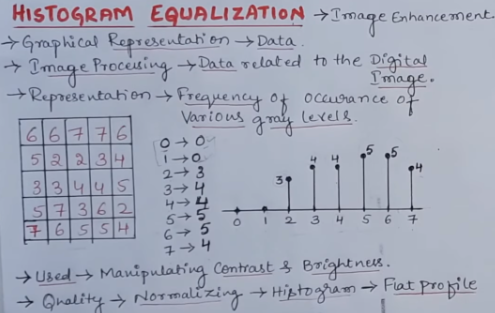

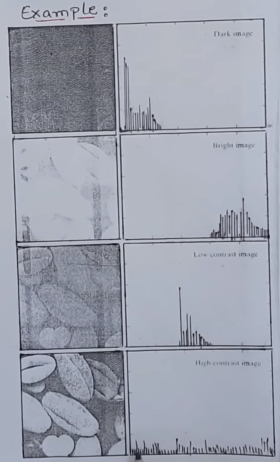

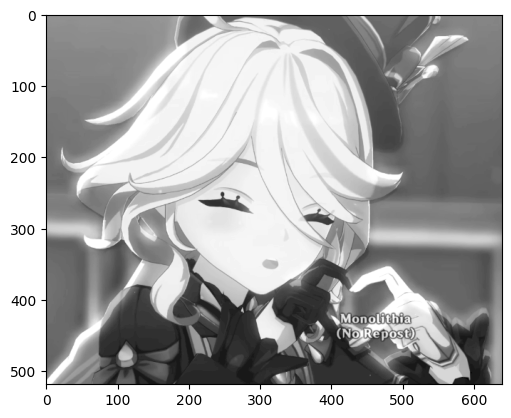

In [2]:
image = cv.imread("furina/furina.png", cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (640, int(image.shape[0] * (640 / image.shape[1]))))

plt.imshow(image, cmap='grey')

In [3]:
image.shape # 816 rows and 1006 columns matrix

(519, 640)

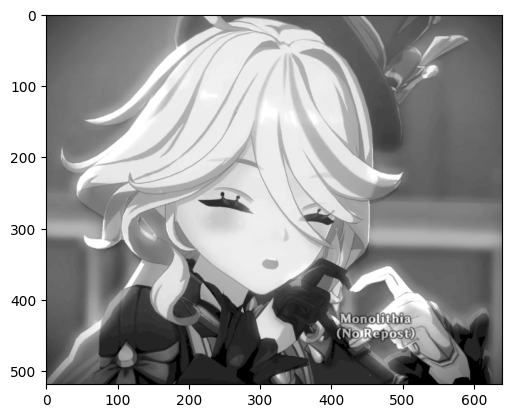

In [4]:
image2 = cv.imread('furina/furinaDark.png', cv.IMREAD_GRAYSCALE)
image2 = cv.resize(image2, (640, int(image2.shape[0] * (640 / image2.shape[1]))))


image3 = cv.imread('furina/furinaLight.png', cv.IMREAD_GRAYSCALE)                
image3 = cv.resize(image3, (640, int(image.shape[0] * (640 / image.shape[1]))))

plt.imshow(image2, cmap='gray')

In [5]:
image2.shape

(519, 640)

### What Does "Bins" Mean in Image Processing?

When creating a histogram for an image:

   + Pixel Intensity Range:
        + For grayscale images: Pixel values range from 0 to 255.
        + For color images (RGB or HSV): Each channel has a range of 0 to 255.

   + Bins Divide the Range:
        + If you set bins=256, each bin corresponds to exactly one intensity level (0, 1, 2, ..., 255).
        + If you set bins=64, each bin represents a range of 4 intensity levels (e.g., bin 0: 0–3, bin 1: 4–7, ..., bin 63: 252–255).

In [6]:
# Create a dictionary with key values from [0, 255] represent the color range. Count each pixels and add 1 to dict[key]
def image_to_histogram(image, bins=256):
    histogram = {}
    
    # initialize color_range to histogram
    for i in range(bins):
        histogram[i] = 0
    
    for row in image:
        for pixel in row:
            if pixel in histogram:
                histogram[pixel] += 1

    sorted_histogram = {key: histogram[key] for key in sorted(histogram)}
    return sorted_histogram


histogram1 = image_to_histogram(image)

print(histogram1)

{0: 4, 1: 1, 2: 0, 3: 2, 4: 1, 5: 1, 6: 1, 7: 0, 8: 1, 9: 1, 10: 5, 11: 1, 12: 1, 13: 2, 14: 2, 15: 4, 16: 1, 17: 1, 18: 0, 19: 1, 20: 2, 21: 2306, 22: 150, 23: 156, 24: 138, 25: 130, 26: 172, 27: 178, 28: 3173, 29: 328, 30: 308, 31: 263, 32: 279, 33: 359, 34: 4556, 35: 395, 36: 392, 37: 407, 38: 457, 39: 4815, 40: 473, 41: 505, 42: 474, 43: 7210, 44: 458, 45: 527, 46: 1655, 47: 370, 48: 327, 49: 378, 50: 2197, 51: 373, 52: 377, 53: 1234, 54: 348, 55: 369, 56: 906, 57: 300, 58: 343, 59: 874, 60: 408, 61: 1075, 62: 284, 63: 316, 64: 1232, 65: 379, 66: 992, 67: 405, 68: 1115, 69: 433, 70: 1027, 71: 447, 72: 1230, 73: 506, 74: 1147, 75: 505, 76: 1367, 77: 499, 78: 1123, 79: 587, 80: 2033, 81: 735, 82: 2971, 83: 881, 84: 6030, 85: 4932, 86: 1038, 87: 4735, 88: 957, 89: 6369, 90: 4486, 91: 1039, 92: 5436, 93: 3997, 94: 1019, 95: 3547, 96: 3554, 97: 845, 98: 2395, 99: 2436, 100: 782, 101: 2725, 102: 2748, 103: 3167, 104: 881, 105: 2520, 106: 3080, 107: 2235, 108: 819, 109: 3485, 110: 3575, 1

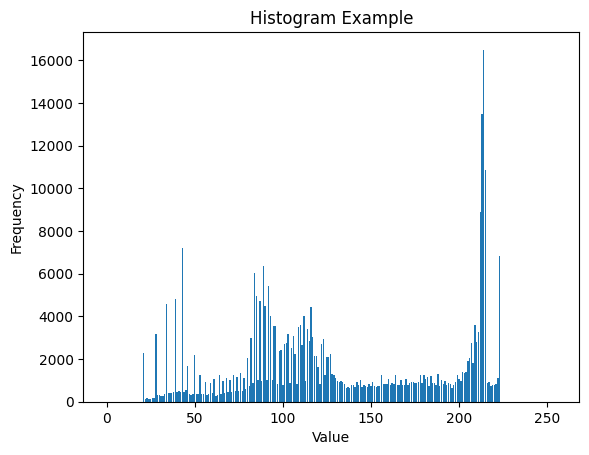

In [7]:
def plot_histogram(histogram:dict, title:str):
    color_range = list(histogram.keys())
    frequencies = list(histogram.values())

    plt.bar(color_range, frequencies)

    # Add title and labels
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Show plot
    plt.show()
    
# Plot 2 Histogram side by side
def plt_subplot_histogram(hist1, hist2):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1) # create 1st subplot
    color_range1 = list(hist1.keys())
    frequencies1 = list(hist1.values())
    plt.bar(color_range1, frequencies1)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title('Original Histogram')
    
    plt.subplot(1, 2, 2) # create 2nd subplot
    color_range2 = list(hist2.keys())
    frequencies2 = list(hist2.values())
    plt.bar(color_range2, frequencies2)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title('Equalized Histogram')
    
    plt.tight_layout() # adjust subplot to fit figure area
    plt.show() 


plot_histogram(histogram1, 'Histogram Example')

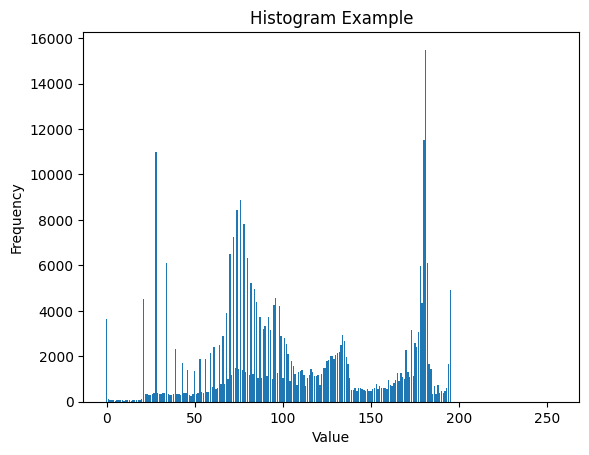

In [8]:
histogram2 = image_to_histogram(image2)
plot_histogram(histogram2, 'Histogram Example')

### Normalization Histogram using PDF (Probability Distribution Function)

original histogram: {0: 4, 1: 1, 2: 0, 3: 2, 4: 1, 5: 0}
normalized_histogram: {0: 0.5, 1: 0.125, 2: 0.0, 3: 0.25, 4: 0.125, 5: 0.0}
cumsum_histogram: {0: 0.5, 1: 0.625, 2: 0.625, 3: 0.875, 4: 1.0, 5: 1.0}


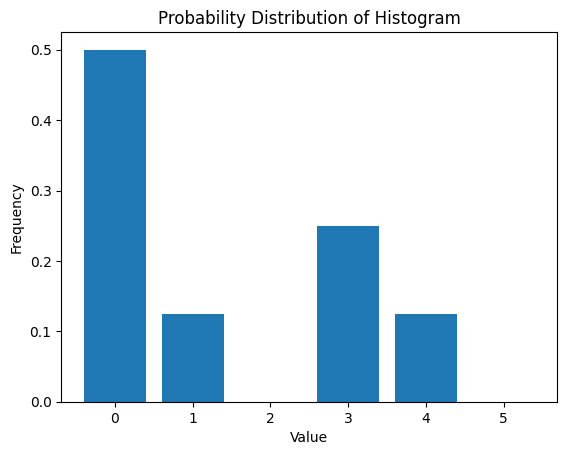

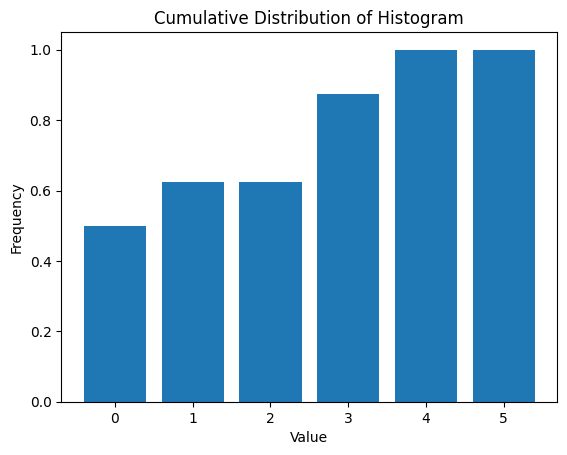

In [9]:
def probability_distribution(histogram):
    total_pixels_value = sum(histogram.values())
    pdf_histogram = {key: value / total_pixels_value for key, value in histogram.items()}
    return pdf_histogram

def cumulativesum_distribution(histogram): # Sum of PDF
    cdf_histogram = {}
    cumulative_sum = 0.0
    
    for color_value, normalized_frequency in histogram.items(): # ensure color is from 0 to 255
        cumulative_sum += normalized_frequency
        cdf_histogram[color_value] = cumulative_sum
    
    return cdf_histogram

# Example histogram for testing
histogram1 = {0: 4, 1: 1, 2: 0, 3: 2, 4: 1, 5: 0}

print('original histogram:', histogram1)
normalized_histogram = probability_distribution(histogram1)
print('normalized_histogram:', normalized_histogram)

# Calculate cumulative sum histogram for later use (i.e., Histogram Equalization)
cumsum_histogram = cumulativesum_distribution(normalized_histogram)
print('cumsum_histogram:', cumsum_histogram)

plot_histogram(normalized_histogram, 'Probability Distribution of Histogram')
plot_histogram(cumsum_histogram, 'Cumulative Distribution of Histogram')

Convert to list to match OpenCV histogram format 

In [10]:
normalized_histogram_value = list(normalized_histogram.values())
print(normalized_histogram_value) 

[0.5, 0.125, 0.0, 0.25, 0.125, 0.0]


## Compute Histogram of Gray Scale Image

Grayscale Histogram: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1677477e-05 4.6709909e-05
 5.8387384e-05 1.1677477e-04 7.3568104e-04 2.4522701e-03 6.5977746e-03
 1.2740128e-02 1.9606484e-02 2.3857087e-02 1.7983316e-02 1.8567190e-02]


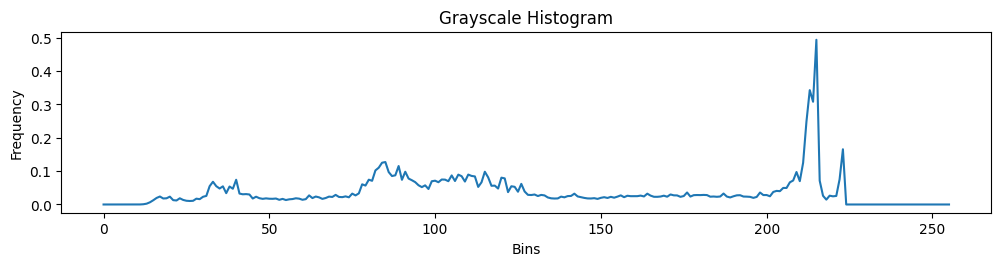

In [ ]:
def compute_histogram(image, bins=256):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    #? calcHist(image, [total_color_channel], mask, histSize, color_range) 
    hist = cv.calcHist([gray_image], [0], None, [bins], [0, 256])
    
    # Normalize the histogram
    hist = cv.normalize(hist, hist).flatten()
    return hist


bgr_image = cv.imread('furina/furina.png') 
# Test the compute_histogram function with the grayscale image
hist_gray = compute_histogram(bgr_image)
print("Grayscale Histogram:", hist_gray[:20])

plt.figure(figsize=(12, 8))

# Plot Grayscale Histogram using lib
def plt_plot_histogram(hist_gray):
    plt.subplot(3, 1, 1)
    plt.plot(hist_gray)
    plt.title('Grayscale Histogram')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')

plt_plot_histogram(hist_gray)

# Histogram Equalization
This part include 
+ Histogram Equalization from Scratch 
+ Histogram Equalization using OpenCV 

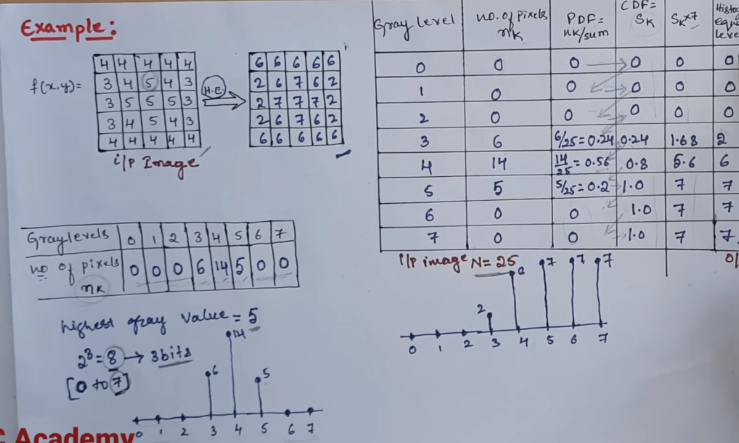
1) Get the highest gray value 5 and its bits (bit size that can represent 5)
2) Initiate gray levels range = $2^{bits}$. e.g. $2^3=8$
3) Compute Histogram Equalization: 
+ **PDF:** Probability Distribution (*value_i / the total_value*)
+ **CDF:** Cumulative Distribution (*cumulative sum*) annotate as $S_{k}$
+ $S_{k} \times max(\text{gray level})$: Multiply CDF with the highest gray level 
+ **Histogram equal level:** approximate value upward (i.e. `.ceil()`  in python)
4) Replace old pixel values with new pixel values.

In [12]:
def bits_require(integer):
    # Iterate through [0, 8]
    for n in range(0, 8+1): # because maximum color range is 255
        if (2**n) >= integer:
            # print(f'bits range: 2^{n}={2**n} to store {integer}')
            return 2**n         
        

## Histogram Equalization Function with Histogram as Input

In [13]:
def histogram_equalization(histogram, plot_hist=False):
    """
        Perform histogram equalization on a grayscale image histogram
        
        Args:
            histogram (dict): Input histogram, e.g., {0: 4, 1: 1, 2: 0, 3: 2, 4: 1, 5: 0}.
            bins (int): Number of bins (default is 256 to ensure 255 is included).
            plot_hist (bool): If True then plot_hist histograms.

        Returns:
            dict: Equalized histogram.
    """
    
    #? Get highest gray value in the image -> [0, max(image_pixel_value)]
    highest_color_value = max(histogram.keys())
    print('highest_gray_value:', highest_color_value)

    #? Get numbers of 2^bits represent highest_color_value 
    color_range = bits_require(highest_color_value)
    
    #? Create histogram dictionray with length == color_range 
    histogram = dict(list(histogram.items())[:color_range]) 

    #? Compute Probability Distribution Function (PDF): 
    pdf_histograms = probability_distribution(histogram)
    print('pdf_histograms:',pdf_histograms)
    
    #? Compute Cumulative Distribution Function (CDF)
    cdf_histograms = cumulativesum_distribution(pdf_histograms)
    print('cdf_histogram:',cdf_histograms)
    
    #? Multiply CDF with color_range
    mul_cdf_histograms = {key:value*color_range for key,value in cdf_histograms.items()}
    print('mul_cdf_histograms:',mul_cdf_histograms)
    
    #? Rounding all histogram value
    histogram_equal_level = {key:round(value) for key, value in mul_cdf_histograms.items()}
    print('histogram_equal_level:', histogram_equal_level)
    
    if plot_hist:
        plot_histogram(histogram, 'Original Histogram')
        plot_histogram(pdf_histograms, 'Normalized Histogram using PDF')
        plot_histogram(histogram_equal_level, 'Histogram Equalization')
        
    
    return histogram_equal_level

### Testing Histogram Equalization on Simple-Histogram and a Real Histogram 

highest_gray_value: 7
pdf_histograms: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.24, 4: 0.56, 5: 0.2, 6: 0.0, 7: 0.0}
cdf_histogram: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.24, 4: 0.8, 5: 1.0, 6: 1.0, 7: 1.0}
mul_cdf_histograms: {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.92, 4: 6.4, 5: 8.0, 6: 8.0, 7: 8.0}
histogram_equal_level: {0: 0, 1: 0, 2: 0, 3: 2, 4: 6, 5: 8, 6: 8, 7: 8}


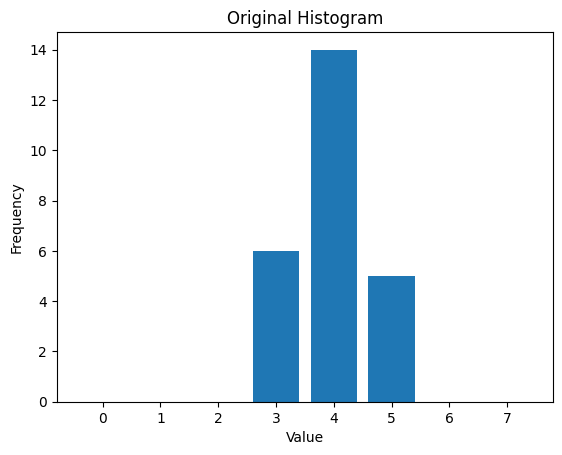

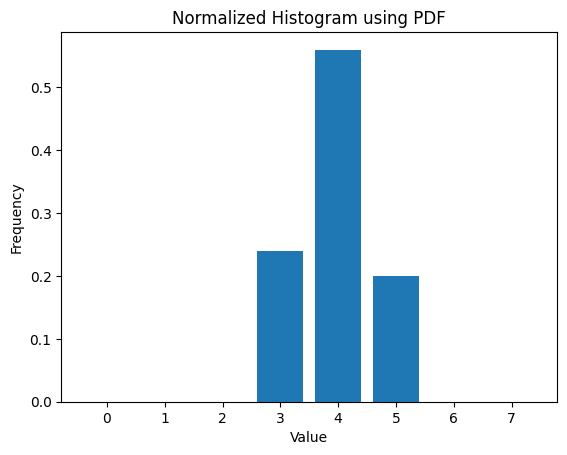

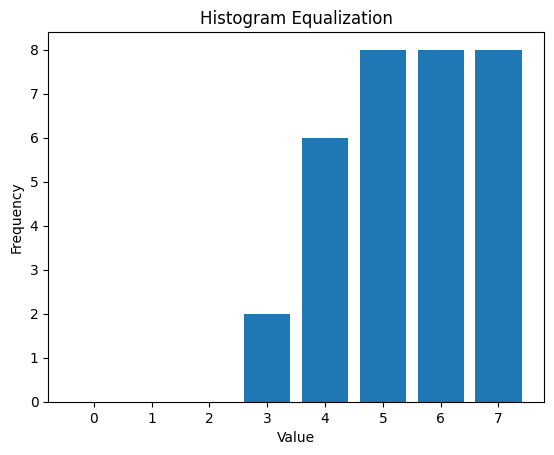

highest_gray_value: 255
pdf_histograms: {0: 1.2042389210019268e-05, 1: 3.010597302504817e-06, 2: 0.0, 3: 6.021194605009634e-06, 4: 3.010597302504817e-06, 5: 3.010597302504817e-06, 6: 3.010597302504817e-06, 7: 0.0, 8: 3.010597302504817e-06, 9: 3.010597302504817e-06, 10: 1.5052986512524085e-05, 11: 3.010597302504817e-06, 12: 3.010597302504817e-06, 13: 6.021194605009634e-06, 14: 6.021194605009634e-06, 15: 1.2042389210019268e-05, 16: 3.010597302504817e-06, 17: 3.010597302504817e-06, 18: 0.0, 19: 3.010597302504817e-06, 20: 6.021194605009634e-06, 21: 0.006942437379576108, 22: 0.00045158959537572253, 23: 0.00046965317919075143, 24: 0.00041546242774566475, 25: 0.0003913776493256262, 26: 0.0005178227360308285, 27: 0.0005358863198458574, 28: 0.009552625240847785, 29: 0.00098747591522158, 30: 0.0009272639691714836, 31: 0.0007917870905587668, 32: 0.0008399566473988439, 33: 0.0010808044315992293, 34: 0.013716281310211947, 35: 0.0011891859344894027, 36: 0.0011801541425818882, 37: 0.00122531310211946

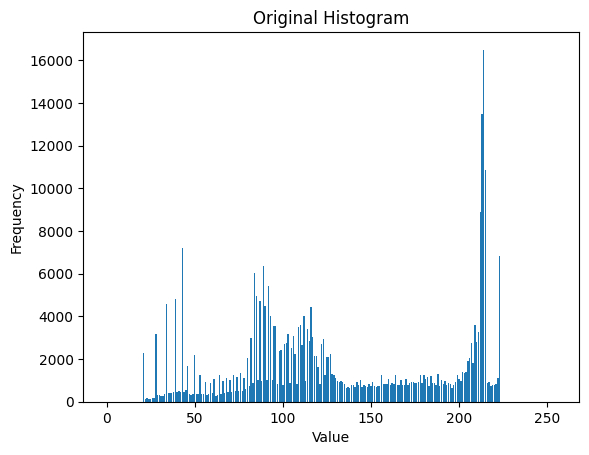

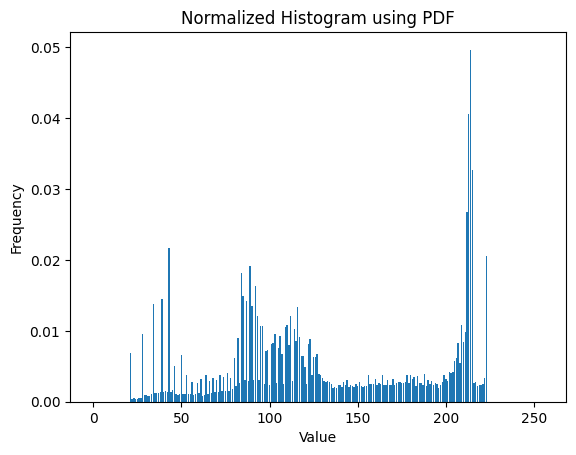

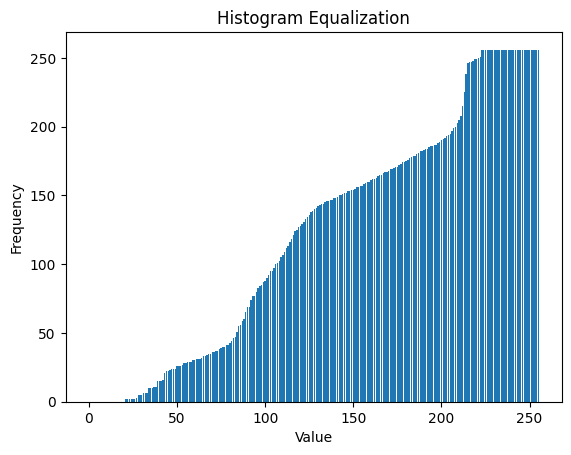

In [14]:
# Example histogram input
test_histogram = {
    0: 0, 1: 0, 2: 0, 3: 6, 4: 14,
    5: 5, 6: 0, 7: 0
}
original_histogram = image_to_histogram(image)
equalized_histogram = histogram_equalization(test_histogram, plot_hist=True)
equalized_histogram = histogram_equalization(original_histogram, plot_hist=True)


In [15]:
def replace_pixel(image, equalized_histogram):
    """
    Replace old pixel values in the image with new equalized values.

    Args:
        image (2D list or NumPy array): Grayscale image to process.
        equalized_histogram (dict): Mapping of old pixel values to new equalized values.

    Returns:
        np.ndarray: Image with updated pixel values.
    """
    
    image = np.array(image, dtype=int)
        
    # Apply the equalized histogram as a lookup table
    equalized_image = np.vectorize(equalized_histogram.get)(image)
    
    return equalized_image
    
    

## Histogram Equalization with Image as Input

In [16]:
def histogram_equalization_image(image, plot_hist=False, plot_img=False, debug=False):
    """
        Perform histogram equalization on a grayscale image histogram
        
        Args:
            histogram (dict): Input histogram, e.g., {0: 4, 1: 1, 2: 0, 3: 2, 4: 1, 5: 0}.
            bins (int): Number of bins (default is 256 to ensure 255 is included).
            plot (bool): If True then plot histograms.

        Returns:
            dict: Equalized histogram.
    """
    #? get histogram
    histogram = image_to_histogram(image)
    
    #? Get highest gray value in the image -> [0, max(image_pixel_value)]
    highest_color_value = max(histogram.keys())
    

    #? Get numbers of 2^bits represent highest_color_value 
    color_range = bits_require(highest_color_value)
    
    #? Create histogram dictionray with length == color_range 
    histogram = dict(list(histogram.items())[:color_range]) 

    #? Compute Probability Distribution Function (PDF): 
    pdf_histograms = probability_distribution(histogram)
    
    #? Compute Cumulative Distribution Function (CDF)
    cdf_histograms = cumulativesum_distribution(pdf_histograms)
    
    #? Multiply CDF with color_range
    mul_cdf_histograms = {key:value*color_range for key,value in cdf_histograms.items()}
    
    #? Rounding all histogram value
    histogram_equal_level = {key:round(value) for key, value in mul_cdf_histograms.items()}
    
    #? Call replace_pixel with the original image and the equalized histogram
    equalized_image = replace_pixel(image, histogram_equal_level)
    
    
    if plot_hist:
        plt_subplot_histogram(histogram, histogram_equal_level)
        
    if debug:
        print('highest_gray_value:', highest_color_value)
        print('pdf_histograms:',pdf_histograms)
        print('cdf_histogram:',cdf_histograms )
        print('mul_cdf_histograms:',mul_cdf_histograms)
        print('histogram_equal_level:', histogram_equal_level)

            
    if plot_img:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        
        plt.subplot(1, 2, 2)
        plt.imshow(equalized_image, cmap='gray')
        plt.title('Equalized Image')
        plt.show()

    return equalized_image, histogram_equal_level

### Compare 2 Image with the same Content with different Brightness using  Histogram Equalization
Problems: Brightness Differences

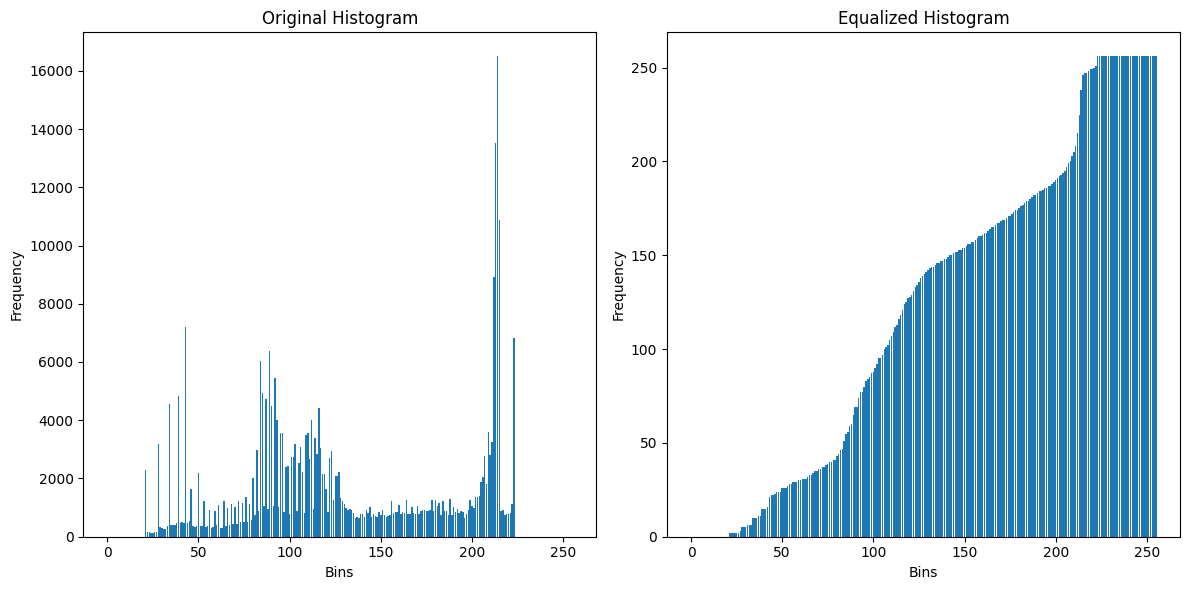

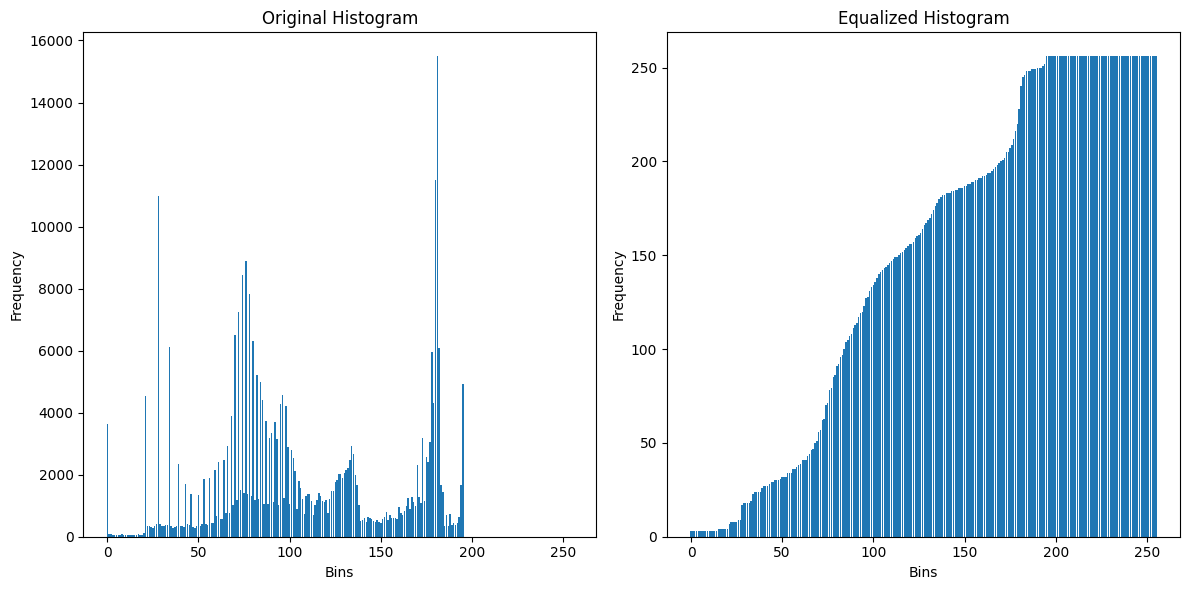

In [17]:
equalized_image1, histogram_equal_level1 = histogram_equalization_image(image, plot_hist=True)
equalized_image2, histogram_equal_level2 = histogram_equalization_image(image2, plot_hist=True)

### Apply Histogram Equalization to Increase Contrast

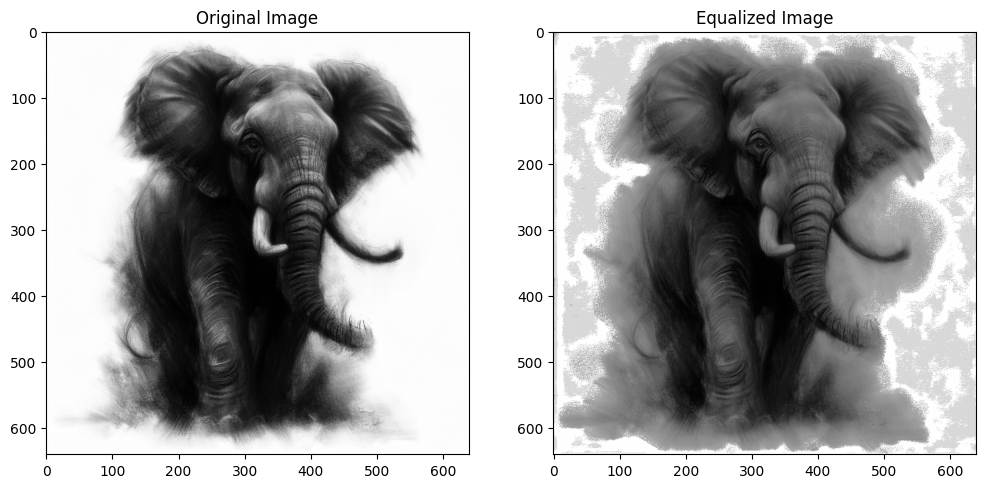

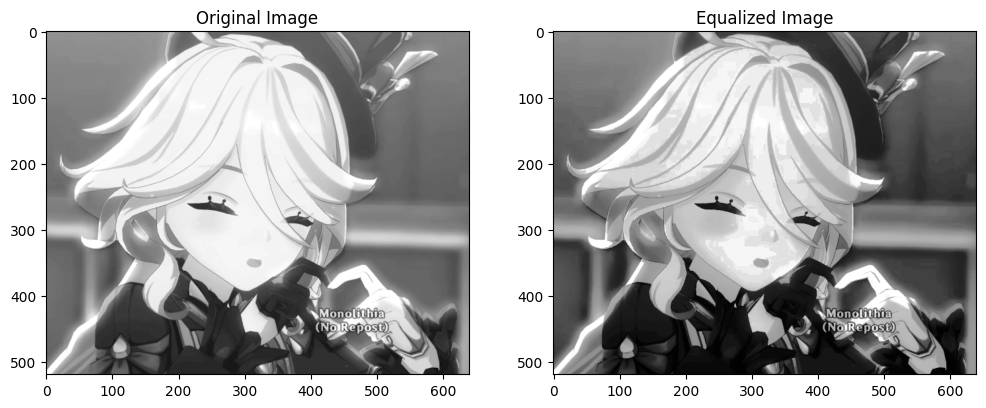

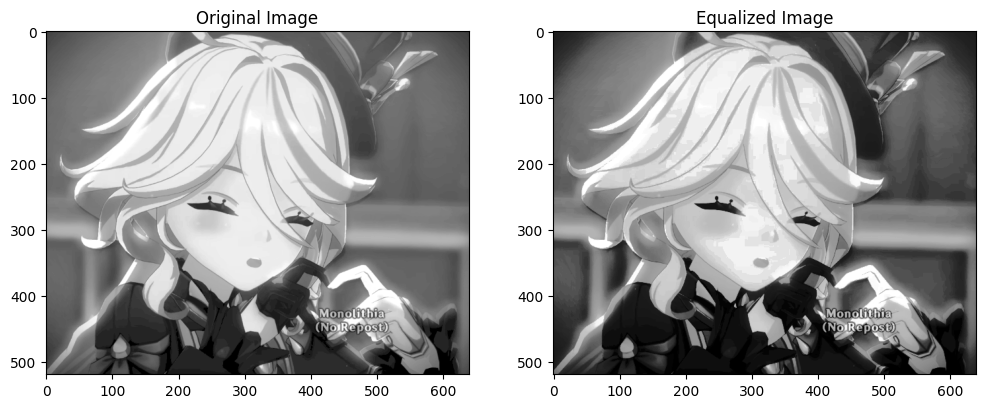

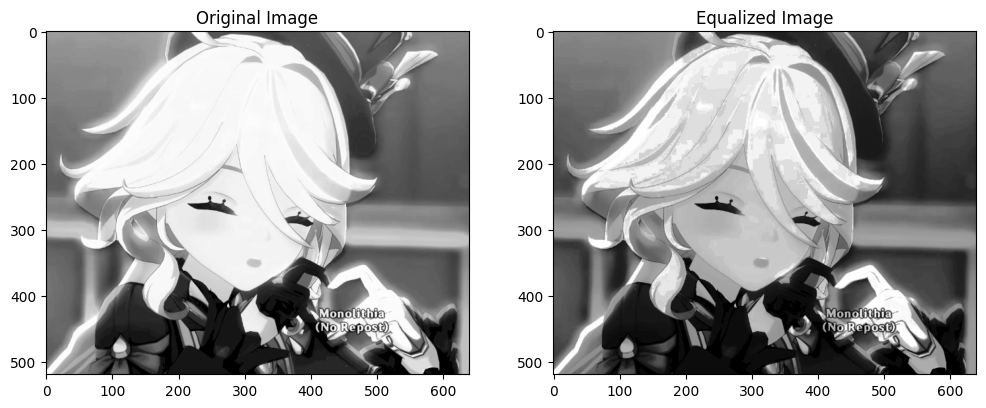

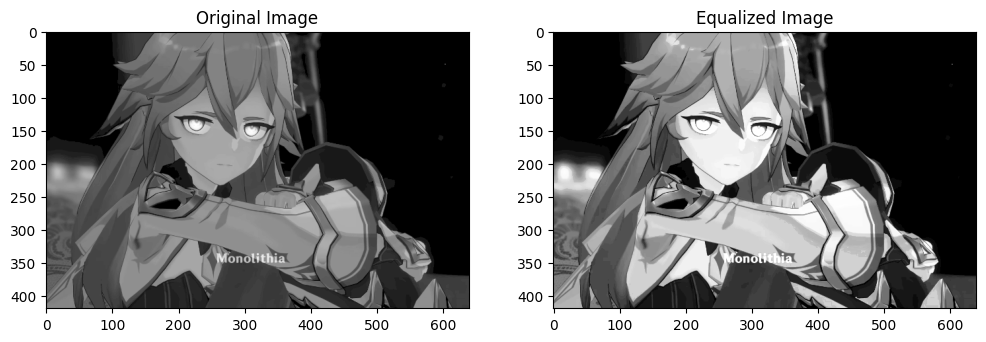

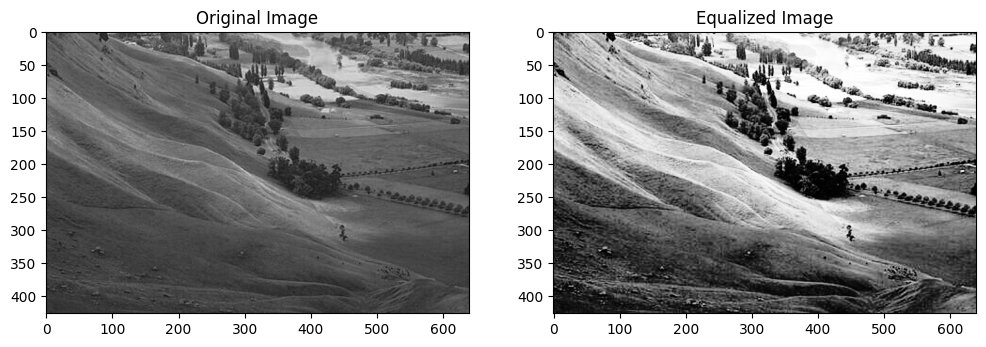

In [18]:
# Ensure the directory exists
output_folder = 'HE_image'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

#? Compute and Store Histogram Equalization Image
def compute_and_store_HE(image_folder):
    # Loop through all images in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            filepath = os.path.join(image_folder, filename)
            image = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
        
            #? Resize all images
            image = cv.resize(image, (640, int(image.shape[0] * (640 / image.shape[1]))))

            #? calc Histogram
            equalized_image, _ = histogram_equalization_image(image, False, True)
            cv.imwrite(f'{output_folder}/{filename}', equalized_image)
        
compute_and_store_HE('furina')

# Image Retrieval using Histogram Similarity

##### Image Retrieval using Histogram Similarity was achieve by comparing histogram using Correlation Coeficient
![image.png](CorrelationCoeficient.png)


In [19]:
def compare_histograms(query_hist, histograms, method='correlation'):
    """
    Compare a query histogram with a list of histograms using a specified method.

    Parameters:
    query_hist (numpy.ndarray): The histogram of the query image.
    histograms (list of numpy.ndarray): A list of histograms to compare against the query histogram.
    method (str): The method to use for comparison. Options are 'correlation', intersection
                  Default is 'correlation'.

    Returns:
    list of float: A list of similarity scores between the query histogram and each histogram in the list.
    """
    methods = {
        'correlation': cv.HISTCMP_CORREL,
        #? other methods in the future
    }
    similarity_scores = [
        cv.compareHist(query_hist, hist, methods[method]) for hist in histograms
    ]
    return similarity_scores

In [20]:
def compute_and_store_histograms(image_folder, bins=256):
    histogram_list = []
    image_path_list = []
    
    # Loop through all images in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            filepath = os.path.join(image_folder, filename)
            image = cv.imread(filepath)

        # calc Histogram
        histogram = compute_histogram(image, bins=bins)
        histogram_list.append(histogram)
        image_path_list.append(filepath)
        
        
    return histogram_list, image_path_list


histogram_list, image_path_list = compute_and_store_histograms('furina')

In [21]:
# Retrieve and display the most similar images
def retrieve_similar_images(query_image_path, image_folder, bins=256, top_n=5, method='correlation'):
    '''
        bins: Number of bins for the histogram (default is 256 for grayscale).
    '''
    # Compute query image histogram
    query_image = cv.imread(query_image_path)
    query_hist = compute_histogram(query_image, bins=bins)
    
    # Compute database histograms
    histograms, image_paths = compute_and_store_histograms(image_folder, bins=bins)
    
    # Compare histograms
    scores = compare_histograms(query_hist, histograms, method=method)
    
    # Sort by similarity score
    # Example: [1, 2, 0][::-1] would result in [0, 2, 1].
    sorted_indices = np.argsort(scores)[::-1]
    
    # Select the top N indices based on the sorted order
    top_indices = sorted_indices[:top_n]
    
    # Display results
    print(f"Top {top_n} similar images:")
    for idx in top_indices:
        print(f"Image: {image_paths[idx]}, Score: {scores[idx]}")
        similar_image = cv.imread(image_paths[idx])
        cv.imshow(f"Similar Image {idx + 1}", similar_image)
    
    cv.imshow("Query Image", query_image)
    cv.waitKey(0)
    cv.destroyAllWindows()

## Home Work: Survey of Histogram Method for Image Retrieval Problem with different bins structure

#### Visualize Histogram of 2 Iamge with the same Contents but different Brightness  

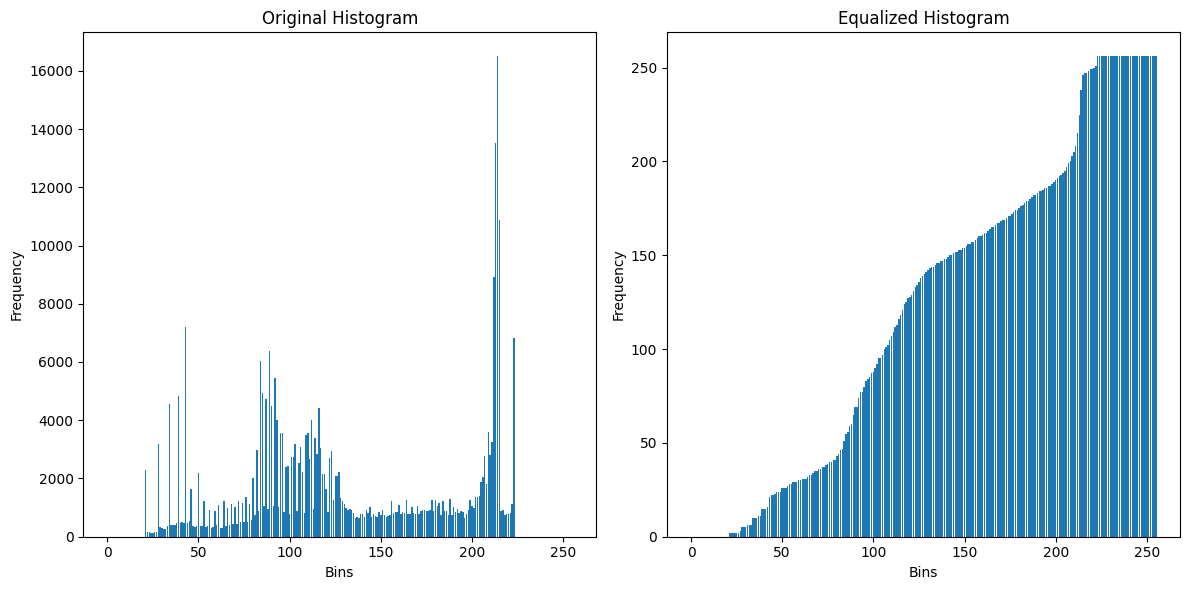

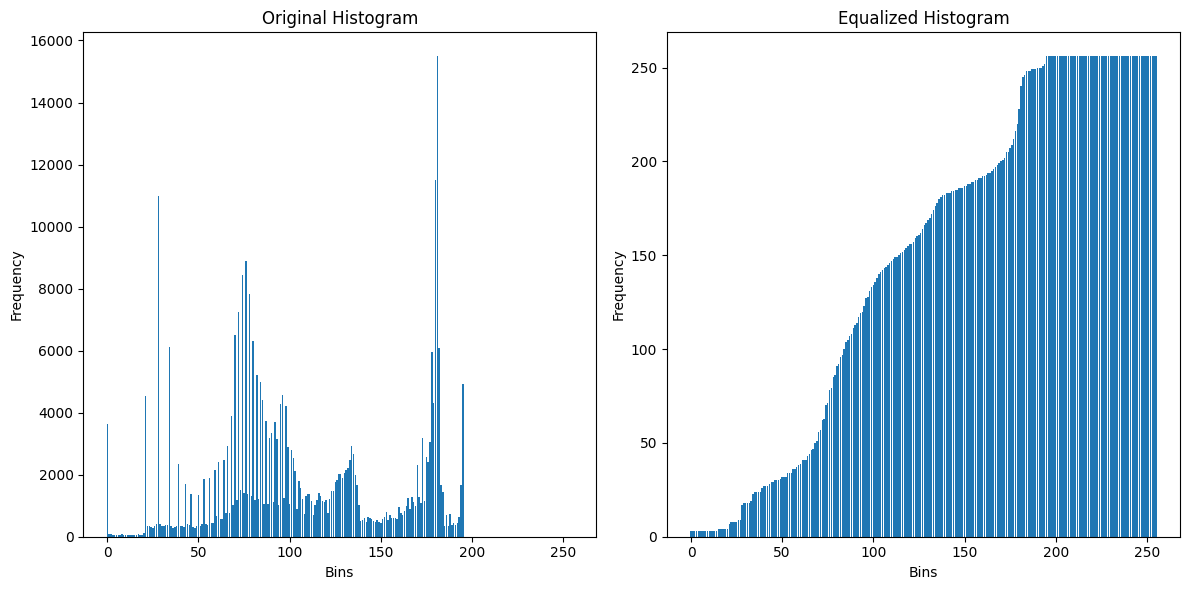

In [22]:
equalized_image1, histogram_equal_level1 = histogram_equalization_image(image, plot_hist=True)
equalized_image2, histogram_equal_level2 = histogram_equalization_image(image2, plot_hist=True)

#### Correlation Coeficient Intuition
![image-2.png](CorrelationCoeficientIntuition.png)

### Survey bins structure: 256, 128, 64, 32   
Conclusion: Both Compute Speed and Similarity Score increase as bins (i.e. color_range) decrease from 256 to 32. 

In [23]:
query_image_path = 'furina/furina.png'
image_folder = 'furina'
# 224 - 255
retrieve_similar_images(query_image_path, image_folder, bins=256, top_n=3, method='correlation')

Top 3 similar images:
Image: furina\furina.png, Score: 1.0
Image: furina\furinaDark.png, Score: 0.05142144097304505
Image: furina\furinaLight.png, Score: -0.07566759621685255


In [24]:
query_image_path = 'furina/furina.png'
image_folder = 'furina'
# 162 - 131
retrieve_similar_images(query_image_path, image_folder, bins=128, top_n=3, method='correlation')

Top 3 similar images:
Image: furina\furina.png, Score: 1.0
Image: furina\furinaDark.png, Score: 0.055104097811872664
Image: furina\furinaLight.png, Score: -0.08657384536133304


In [25]:
query_image_path = 'furina/furina.png'
image_folder = 'furina'
# 32-63
retrieve_similar_images(query_image_path, image_folder, bins=64, top_n=3, method='correlation')

Top 3 similar images:
Image: furina\furina.png, Score: 1.0
Image: furina\furinaDark.png, Score: 0.0622411915186931
Image: furina\furinaLight.png, Score: -0.09736216017444937


In [26]:
query_image_path = 'furina/furina.png'
image_folder = 'furina'
# 0 - 31
retrieve_similar_images(query_image_path, image_folder, bins=32, top_n=3, method='correlation')

Top 3 similar images:
Image: furina\furina.png, Score: 1.0
Image: furina\furinaDark.png, Score: 0.08190919849997567
Image: furina\sucrose.png, Score: -0.1416098119060196


### Survey bins structure: 256, 128, 64, 32 using Histogram Equalization

**Conclusion:** Histogram Equalization help to avoid negative value during comparision using correlation Coefficient while worsten similarity score.  

In [27]:
query_image_path = 'HE_image/furina.png'
image_folder = 'HE_image'
retrieve_similar_images(query_image_path, image_folder, bins=256, top_n=3, method='correlation')

Top 3 similar images:
Image: HE_image\furina.png, Score: 1.0
Image: HE_image\Unequalized_Hawkes_Bay_NZ.jpg, Score: 0.048811228785751226
Image: HE_image\Equalized_Hawkes_Bay_NZ.jpg, Score: 0.048811228785751226


In [28]:
query_image_path = 'HE_image/furina.png'
image_folder = 'HE_image'
# 162 - 131
retrieve_similar_images(query_image_path, image_folder, bins=128, top_n=3, method='correlation')

Top 3 similar images:
Image: HE_image\furina.png, Score: 1.0
Image: HE_image\Unequalized_Hawkes_Bay_NZ.jpg, Score: 0.10750304298784476
Image: HE_image\Equalized_Hawkes_Bay_NZ.jpg, Score: 0.10750304298784476


In [29]:
query_image_path = 'HE_image/furina.png'
image_folder = 'HE_image'
# 63 - 32
retrieve_similar_images(query_image_path, image_folder, bins=64, top_n=3, method='correlation')

Top 3 similar images:
Image: HE_image\furina.png, Score: 1.0
Image: HE_image\Unequalized_Hawkes_Bay_NZ.jpg, Score: 0.05301956188815982
Image: HE_image\Equalized_Hawkes_Bay_NZ.jpg, Score: 0.05301956188815982


In [30]:
query_image_path = 'HE_image/furina.png'
image_folder = 'HE_image'
# 0 - 31
retrieve_similar_images(query_image_path, image_folder, bins=32, top_n=3, method='correlation')

Top 3 similar images:
Image: HE_image\furina.png, Score: 1.0
Image: HE_image\Unequalized_Hawkes_Bay_NZ.jpg, Score: 0.10946806948628825
Image: HE_image\Equalized_Hawkes_Bay_NZ.jpg, Score: 0.10946806948628825
